In [6]:
from astropy.units import Quantity
from gammapy.astro.population import simulate


catalog = simulate.make_base_catalog_galactic(n_sources=1E3, rad_dis='YK04', vel_dis='H05', max_age=Quantity(1E6, 'yr'))
simulate.add_observed_parameters(catalog)
catalog.write('catalog.fits', overwrite=True)

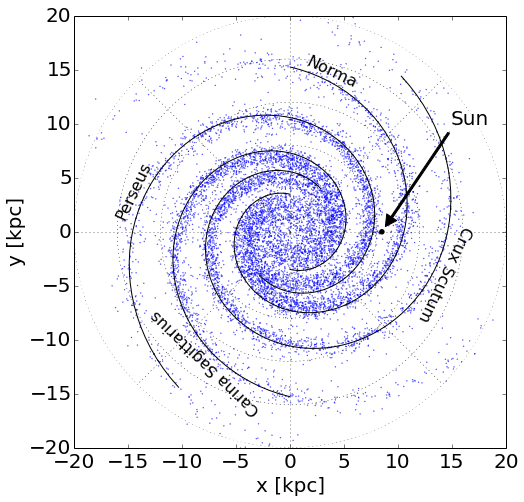

In [4]:
from gammapy.astro.population import FaucherSpiral
from gammapy.utils.coordinates import polar, cartesian

spiral = FaucherSpiral()

textsize = 20
rc('xtick', labelsize=textsize)
rc('ytick', labelsize=textsize)
rc('font', size=textsize)
rc('figure', figsize=(8, 8))

fig = plt.figure()
rect = [0.15, 0.15, 0.75, 0.75]
ax_cartesian  = fig.add_axes(rect)
ax_cartesian.set_aspect('equal')
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.axes.get_xaxis().set_ticklabels([])
ax_polar.axes.get_yaxis().set_ticklabels([])

ax_cartesian.scatter(catalog['x'], catalog['y'], s=0.1, color='b')
ax_cartesian.set_xlim(-20, 20)
ax_cartesian.set_ylim(-20, 20)
ax_cartesian.set_xlabel('x [kpc]')
ax_cartesian.set_ylabel('y [kpc]')
ax_cartesian.scatter(8.5, 0, color='k', s=20, marker='o')
ax_cartesian.annotate('Sun', xy=(8.5, 0),  xycoords='data',
                xytext=(15, 10), arrowprops=dict(facecolor='black', shrink=0.05, width=2))

plt.grid(True)
from astropy.units import Quantity

ind = [95, 90, 80, 80]

for i in range(4):
    theta_0 = spiral.theta_0[i].value
    theta = Quantity(np.linspace(theta_0, theta_0 + 2 * np.pi, 100), 'rad')
    x, y = spiral.xy_position(theta=theta, spiralarm_index=i)
    ax_cartesian.plot(x.value, y.value, color='k')
    rad, phi = polar(x[ind[i]], y[ind[i]])
    x_pos, y_pos = cartesian(rad + Quantity(1, 'kpc'), phi)
    rotation = theta[ind[i] * 0.97].to('deg').value
    ax_cartesian.text(x_pos.value, y_pos.value, spiral.spiralarms[i],
             ha='center', va='center', rotation=rotation - 90, size=16)  
    
savefig('spiral.pdf', dpi=120)